In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json


In [2]:
# Define the graph as a dictionary
graph_dict = {
    "A": {"B": {"volume": "?"}, "C": {"volume": 3},   "D": {"volume": 2}},
    "B": {"A": {"volume": "?"}, "E": {"volume": 3},   "F": {"volume": 6}},
    "C": {"A": {"volume": 4},   "G": {"volume": "?"}, "H": {"volume": 3}},
    "D": {"A": {"volume": 3},   "I": {"volume": 6},   "J": {"volume": 8}},
    "E": {"B": {"volume": 5},   "K": {"volume": 7}},
    "F": {"B": {"volume": 7},   "L": {"volume": 4}},
    "G": {"C": {"volume": "?"}, "M": {"volume": 6}},
    "H": {"C": {"volume": 3},   "N": {"volume": 5}},
    "I": {"D": {"volume": 7},   "O": {"volume": 5}},
    "J": {"D": {"volume": 7},   "P": {"volume": 8}},
    "K": {"E": {"volume": 8}},
    "L": {"F": {"volume": 3}},
    "M": {"G": {"volume": 7}},
    "N": {"H": {"volume": 2}},
    "O": {"I": {"volume": 10}},
    "P": {"J": {"volume": 8}},
}


In [3]:
def get_previous_next_neighbors(graph_dict, node):
    nodes = list(graph_dict.keys())
    index = nodes.index(node)
    previous_node = nodes[index - 1] if index > 0 else nodes[-1]
    next_node = nodes[index + 1] if index < len(nodes) - 1 else nodes[0]
    return previous_node, next_node


def calculate_avg_volume(graph_dict, nodes):
    volumes = []
    for node in nodes:
        for neighbor, attributes in graph_dict[node].items():
            if attributes["volume"] != "?":
                volumes.append(attributes["volume"])
    return round(sum(volumes) / len(volumes)) if volumes else 0


# Iterate through the dictionary and fill missing volumes
for node, neighbors in graph_dict.items():
    for neighbor, attributes in neighbors.items():
        if attributes["volume"] == "?":
            previous_neighbor, next_neighbor = get_previous_next_neighbors(graph_dict, node)
            avg_volume = calculate_avg_volume(graph_dict, [previous_neighbor, next_neighbor])
            attributes["volume"] = avg_volume



In [4]:
# Save graph_dict as json for further usage
with open("graphJson.json", "w") as f:
    json.dump(graph_dict, f, indent=4)

In [5]:
# Create an empty directed graph
G = nx.DiGraph()

In [6]:

# Iterate through the dictionary and add edges along with their attributes
for node, neighbors in graph_dict.items():
    for neighbor, attributes in neighbors.items():
        G.add_edge(node, neighbor, **attributes)

In [7]:
pos = nx.spring_layout(G, seed=2)
labels = {(u, v): data["volume"] for u, v, data in G.edges(data=True)}


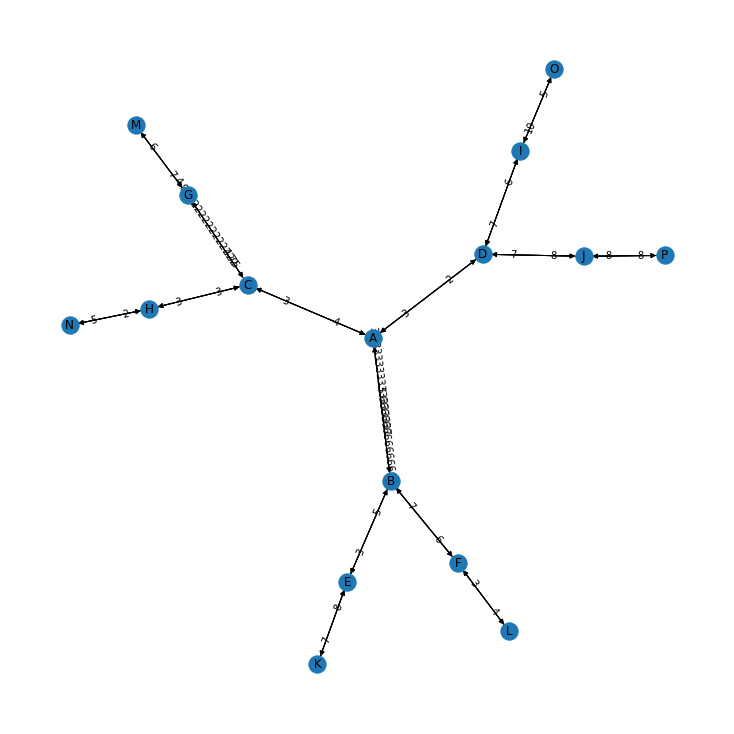

In [8]:
plt.figure(figsize=(10, 10))
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(
    G, pos, labels, label_pos=0.3, bbox=dict(alpha=0), font_size=10
)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.savefig("undirected_digraphFromDict.png", dpi=400)
plt.show()